In [ ]:
import numpy as np

def normalization(x):
    x_max = np.max(x)
    x_min = np.min(x)
    return (x - x_min) / (x_max - x_min)

In [ ]:
from sklearn import datasets
import numpy as np

iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target
n_data = len(correct) #샘플 수

#standalization
ave_input = np.average(input_data, axis = 0)
std_input = np.std(input_data, axis = 0)
input_data = (input_data - ave_input) / std_input

#원핫 인코딩 변환
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct_data[i]] = 1.0

#훈련 데이터 테스트 데이터 분할
index = np.arange(n_data)
index_train = index[index % 2 == 0]
index_test = index[index % 2 != 0]

input_train = input_data[index_train, :] #훈련 데이터 입력
correct_train = correct_data[index_train, :] #훈련 데이터 정답
input_test = input_data[index_test, :] #테스트 데이터 입력
correct_test = correct_data[index_train, :] #테스트 데이터 정답

: 

In [ ]:



class BaseLayer:
    def __init__(self, n_upper, n):
        
        #가중치와 편향(행렬과 벡터)
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)

    
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b



class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) #ReLU


    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU 미분

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)

        self.grad_x = np.dot(delta, self.w.T)



class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b

        #softmax function
        self.y = np.exp(u) / np.sum(np.exp(u), axis = 1, keepdims=True)


    def backward(self, t):
        delta = self.y - t

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)

        self.grad_x = np.dot(delta, self.w.T)

In [ ]:
#각층 초기화
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

#순전파
def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)

#역전파
def backpropagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(middle_layer_2.grad_x)

#가중치, 편향 수정
def uppdate_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)

#교차 엔트로피 오차 계산
def get_error(t, batch_size):
    return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size

In [ ]:
#미니 배치법 구현

n_batch = n_train // batch_size #1에포크당 배치수
for i in range(epoch):

    # . . .

        #학습
        index_random = np.arange(n_train)
        np.random.shuffle(index_random) #인덱스 랜덤 섞기
        for j in range(n_batch):
                
                #미니배치 샘플 추출
                mb_index = index_random[j * batch_size : (j + 1) * batch_size]

                x = input_train[mb_index, :]
                t = correct_train[mb_index, :]

                #순전파 역전파
                forward_propagation(x)
                backpropagation(x)

                #가중치, 편향 수정
                update_wb()

In [ ]:
#정답률 측정

forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, 
                               axis = 1) == np.argmax(correct_train, axis = 1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, 
                              axis = 1) == np.argmax(correct_test, axis = 1))

print("Accuracy Train: ", str(count_train / n_train * 100) + "%",
      "Accuracy Test: ", str(count_test / n_test * 100) + "%")


np.argmax(output_layer.y, axis = 1)
np.argmax(correct_train, axis = 1)



Epoch: 0/1600 Error_train: 1.099232316939993 Error_test 1.0993293618571431
Epoch: 100/1600 Error_train: 0.3112965510377083 Error_test 0.30245850445725514
Epoch: 200/1600 Error_train: 0.218777396039174 Error_test 0.21631946008553868
Epoch: 300/1600 Error_train: 0.1721109426761336 Error_test 0.16956303917066734
Epoch: 400/1600 Error_train: 0.1399764524355432 Error_test 0.14285951983692277
Epoch: 500/1600 Error_train: 0.11689223469549972 Error_test 0.12524552964248103
Epoch: 600/1600 Error_train: 0.10119427832697951 Error_test 0.11152626610183079
Epoch: 700/1600 Error_train: 0.09007948635042451 Error_test 0.10437732894408629
Epoch: 800/1600 Error_train: 0.08122547823317701 Error_test 0.09841662062750078
Epoch: 900/1600 Error_train: 0.07555343074501887 Error_test 0.09411332616814691
Epoch: 1000/1600 Error_train: 0.07042337619114374 Error_test 0.09001697004664515
Epoch: 1100/1600 Error_train: 0.06611234117802395 Error_test 0.08667929886838319
Epoch: 1200/1600 Error_train: 0.0626397788089534

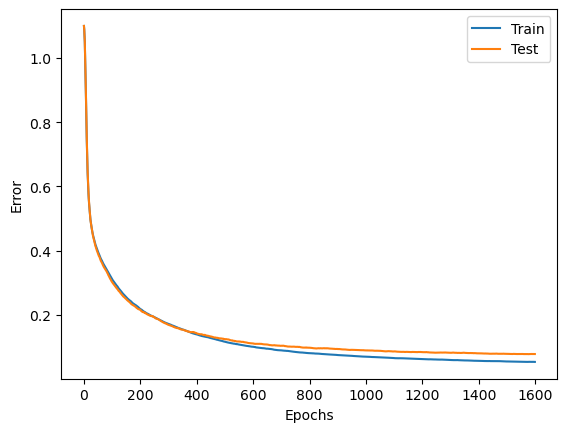

Accuracy Train:  97.33333333333334% Accuracy Test:  96.0%


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
#붓꽃 품종 분류 문제(전체 코드))

#은닉층 활성화 함수: ReLU
#출력층 활성화 함수: 소프트맥스 함수
#손실 함수: 교차 엔트로피 오차
#최적화 알고리즘: 확률적 경사 하강법
#배치 사이즈: 8
#은닉층의 뉴런 수: 25

#코드 흐름
#1. 데이터 입력과 전처리
#2. 각 층 구현
#3. 신경망 구축
#4. 미니 배치법으로 학습
#5. 정답률 측정

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target
n_data = len(correct) #샘플 수

#standalization
ave_input = np.average(input_data, axis = 0)
std_input = np.std(input_data, axis = 0)
input_data = (input_data - ave_input) / std_input

#원핫 인코딩 변환
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0

#훈련 데이터 테스트 데이터 분할
index = np.arange(n_data)
index_train = index[index % 2 == 0]
index_test = index[index % 2 != 0]

input_train = input_data[index_train, :] #훈련 데이터 입력
correct_train = correct_data[index_train, :] #훈련 데이터 정답
input_test = input_data[index_test, :] #테스트 데이터 입력
correct_test = correct_data[index_train, :] #테스트 데이터 정답


n_train = input_train.shape[0] #훈련 데이터 샘플 수
n_test = input_test.shape[0] #테스트 데이터 샘플 수

#입력 은닉 출력층 뉴런 개수
n_in = 4 
n_mid = 25
n_out = 3

wb_width = 0.1
eta = 0.01
epoch = 1600
batch_size = 8
interval = 100






#확률적 경사 하강법
# class BaseLayer:
#     def __init__(self, n_upper, n):
        
#         #가중치와 편향(행렬과 벡터)
#         self.w = wb_width * np.random.randn(n_upper, n)
#         self.b = wb_width * np.random.randn(n)

    
#     def update(self, eta):
#         self.w -= eta * self.grad_w
#         self.b -= eta * self.grad_b


#아다그라드 구현
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n) #가중치(행렬)
        self.b = wb_width * np.random.randn(n) #편향(벡터)
        
        self.h_w = np.zeros((n_upper, n)) + 1e-8
        self.h_b = np.zeros(n) + 1e-8

    def update(self, eta):
        self.h_w += self.grad_w * self.grad_w
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b


class MiddleLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) #ReLU


    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1) #ReLU 미분

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)

        self.grad_x = np.dot(delta, self.w.T)



class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b

        #softmax function
        self.y = np.exp(u) / np.sum(np.exp(u), axis = 1, keepdims=True)


    def backward(self, t):
        delta = self.y - t

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)

        self.grad_x = np.dot(delta, self.w.T)


#드롭아웃 구현

class Dropout:
    def __init__(self, dropout_ratio) -> None:
        self.dropout_ratio = dropout_ratio

    def forward(self, x, is_train):
        if is_train:
            rand = np.random.rand(*x.shape) #난수 행렬
            self.dropout = np.where(rand > self.dropout_ratio, 1, 0)
            self.y = x * self.dropout
        else:
            self.y = (1 - self.dropout_ratio) * x
    def backward(self, grad_y):
        self.grad_x = grad_y * self.dropout
        
#각층 초기화 2

middle_layer_1 = MiddleLayer(n_in, n_mid)
dropout_1 = Dropout(0.5)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
dropout_2 = Dropout(0.5)
output_layer = OutputLayer(n_mid, n_out)

#순전파
def forward_propagation(x, is_train):
    middle_layer_1.forward(x)
    dropout_1.forward(middle_layer_1.y, is_train)
    middle_layer_2.forward(dropout_1.y)
    dropout_2.forward(middle_layer_2.y, is_train)
    output_layer.forward(dropout_2.y)

#역전파
def backpropagation(t):
    output_layer.backward(t)
    dropout_2.backward(output_layer.grad_x)
    middle_layer_2.backward(dropout_2.grad_x)
    dropout_1.backward(middle_layer_2.grad_x)
    middle_layer_1.backward(dropout_1.grad_x)


#가중치, 편향 수정
def uppdate_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)





#교차 엔트로피 오차 계산
def get_error(t, batch_size):
    return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size






#오차 기록용 코드
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []



#미니 배치법 구현

n_batch = n_train // batch_size #1에포크당 배치수
for i in range(epoch):

    #오차 계측
    forward_propagation(input_train, is_train=False)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test, is_train=False)
    error_test = get_error(correct_test, n_test)

    #오차 기록
    test_error_x.append(i)
    test_error_y.append(error_test)
    train_error_x.append(i)
    train_error_y.append(error_train)

    #경과 표시
    if i % interval == 0:
        print("Epoch: " + str(i) + "/" + str(epoch),
              "Error_train: " + str(error_train),
              "Error_test " + str(error_test))

    #학습
    index_random = np.arange(n_train)
    np.random.shuffle(index_random) #인덱스 랜덤 섞기
    for j in range(n_batch):
            
            #미니배치 샘플 추출
            mb_index = index_random[j * batch_size : (j + 1) * batch_size]
            x = input_train[mb_index, :]
            t = correct_train[mb_index, :]

            #순전파 역전파
            forward_propagation(x, is_train=True)
            backpropagation(t)

            #가중치, 편향 수정
            uppdate_wb()


#기록된 오차를 그래프로 표시
plt.plot(train_error_x, train_error_y, label = "Train")
plt.plot(test_error_x, test_error_y, label = "Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()




#정답률 측정

forward_propagation(input_train, is_train=True)
count_train = np.sum(np.argmax(output_layer.y, 
                               axis = 1) == np.argmax(correct_train, axis = 1))

forward_propagation(input_test, is_train=False)
count_test = np.sum(np.argmax(output_layer.y, 
                              axis = 1) == np.argmax(correct_test, axis = 1))

print("Accuracy Train: ", str(count_train / n_train * 100) + "%",
      "Accuracy Test: ", str(count_test / n_test * 100) + "%")


np.argmax(output_layer.y, axis = 1)
np.argmax(correct_train, axis = 1)



In [ ]:
#아다그라드 구현

class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n) #가중치(행렬)
        self.b = wb_width * np.random.randn(n) #편향(벡터)
        
        self.h_w = np.zeros((n_upper, n)) + 1e-8
        self.h_b = np.zeros(n) + 1e-8

    def update(self, eta):
        self.h_w += self.grad_w * self.grad_w
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b

In [ ]:
#드롭아웃 구현

class Dropout:
    def __init__(self, dropout_ratio) -> None:
        self.dropout_ratio = dropout_ratio

    def forward(self, x, is_train):
        if is_train:
            rand = np.random.rand(*x.shape) #난수 행렬
            self.dropout = np.where(rand > self.dropout_ratio, 1, 0)
            self.y = x * self.dropout
        else:
            self.y = (1 - self.dropout_ratio) * x
    def backward(self, grad_y):
        self.grad_x = grad_y * self.dropout

In [47]:
samples = np.array([[5.0, 3.5, 1.0, 0.5], #iris1
                   [5.5, 2.5, 4.0, 1.0], #iris2
                   [7.0, 3.0, 6.0, 2.0], #iris3
                   [6.6, 2.5, 1.5, 0.2]  #iris4
                   ])

#표준화
ave_input = np.average(samples, axis = 0)
std_input = np.std(samples, axis = 0)
samples = (samples - ave_input) / std_input

#판정(False는 훈련데이터가 아니다)
forward_propagation(samples, False)
print(output_layer.y)

[[9.99995093e-01 4.89406779e-06 1.24636438e-08]
 [7.08622700e-04 9.22764335e-01 7.65270420e-02]
 [1.29058808e-11 2.31425596e-03 9.97685744e-01]
 [5.95010477e-01 4.01742366e-01 3.24715737e-03]]
